# Bicicletas Londres

## Importacion

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv
from itertools import islice
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

## Obtención de csv

In [2]:
csvfiler = r"C:\Users\David\PycharmProjects\first_project\Bicicletas\LondonBikeJourneyAug2023.csv"

Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration

### División de los datos deseados

In [3]:
start_station_categories = []
end_station_categories = []
total_duration_ms = []
model_bike = []

In [4]:
with open (csvfiler, newline="") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        start_station_categories.append(row["Start station"])
        end_station_categories.append(row["End station"])
        total_duration_ms.append(row["Total duration (ms)"])
        model_bike.append(row["Bike model"])

### Creación de listas de los diferentes nombres de estaciones de start con la cantidad de usos de cada una

In [5]:
label_encoder = LabelEncoder()
lista_start_estaciones = list(Counter(start_station_categories).keys())
start_counter = Counter(start_station_categories)
codigo_start = label_encoder.fit(lista_start_estaciones)
codigo_start = label_encoder.transform(lista_start_estaciones)

### Creación de listas de los diferentes nombres de estaciones de end con la cantidad de usos de cada una

In [6]:
label_encoder = LabelEncoder()
end_counter = Counter(end_station_categories)
lista_end_estaciones = list(Counter(end_station_categories).keys())
codigo_end = label_encoder.fit(lista_end_estaciones)
codigo_end = label_encoder.transform(lista_end_estaciones)

### Creación de listas de los diferentes nombres de bicicletas con la cantidad de usos de cada una

In [7]:
label_encoder = LabelEncoder()
bike_counter = Counter(model_bike)
print(bike_counter)
lista_bikes = list(Counter(model_bike).keys())
codigo_bike = label_encoder.fit(lista_bikes)
codigo_bike = label_encoder.transform(lista_bikes)

Counter({'CLASSIC': 716639, 'PBSC_EBIKE': 59888})


## Iniciación geolocalizador

In [183]:
# Función para obtener las coordenadas geográficas de una estación
geolocalizador = Nominatim(user_agent="registros_bicicletas_londres")
def obtener_coordenadas(nombre_estacion):
    location = geolocalizador.geocode(nombre_estacion)
    return (location.latitude, location.longitude) if location else None

# Calcular la distancia entre cada par de estaciones
def calcular_distancia(coord1, coord2):
    if coord1 and coord2:
        return geodesic(coord1, coord2).kilometers
    else:
        return None


## Creación de gráficos de uso start

In [209]:
lista_lugares = ["Abadía de Westminster", "Big Ben", "London Eye", "Tower Bridge", "Hyde Park", "National Gallery", "Palacio de Buckingham", "Covent Garden"]
lista_lugares_coordenadas = list(map(obtener_coordenadas, lista_lugares))

In [189]:
print(calcular_distancia(lista_lugares_coordenadas[0], lista_lugares_coordenadas[6]))

1.0959117836406396


In [210]:
def lugar_mas_cercano(estacion, lugares):
    if estacion and lugares:
        lista_cercania = []
        for i in lugares:
            lista_cercania.append(calcular_distancia(obtener_coordenadas(estacion), i))
        return (min(lista_cercania), lista_cercania.index(min(lista_cercania)))
    else:
        return None
datos = lugar_mas_cercano(list(start_counter.keys())[3], lista_lugares_coordenadas)

In [ ]:
# Define los valores para el gráfico polar
# Define los límites para cada sección
theta_limits = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi]
N = len(lista_start_estaciones)
grupo_perteneciente = []
for i in lista_start_estaciones:
    try:
        grupo_perteneciente.append(lugar_mas_cercano(i, lista_lugares_coordenadas))
    except:
        pass
r = 2 * np.array(list(start_counter.values()))
theta = tetha_limits[grupo_perteneciente[1]]
area = 200 * r**2

# Define los colores basados en los ángulos
colors = theta

# Crea el gráfico polar
fig = plt.figure()
ax = fig.add_subplot(projection='polar')



# Define los radios para cada sección
r_limits = [0.1, 0.3, 0.5, 0.7, 0.9]

# Itera sobre cada punto y ajusta su posición relativa dentro de cada sección
for i in range(N):
    # Encuentra la sección correspondiente
    section = 0
    while theta[i] > theta_limits[section]:
        section += 1
    section -= 1

    # Ajusta el radio para que esté dentro de la sección
    r[i] = r_limits[section] + (r_limits[section + 1] - r_limits[section]) * (r[i] - r.min()) / (r.max() - r.min())

# Grafica los puntos ajustados
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

plt.show()

## **Conversion de datos a numéricos**

In [8]:
lista_buena_start = []
for i in codigo_start:
    for x in start_counter:
        for z in x:
            lista_buena_start.append(i)
        

In [16]:
lista_buena_end = []
for i in codigo_end:
    for x in end_counter:
        for z in x:
            lista_buena_end.append(i)

In [25]:
lista_buena_bike = []
print(codigo_bike)
for i in bike_counter:
    for x in range(bike_counter[i]):
        lista_buena_bike.append(i)

[0 1]


In [28]:
print(len(lista_buena_start), len(lista_buena_end), len(lista_buena_bike))

17281600 17367310 776527


<BarContainer object of 800 artists>

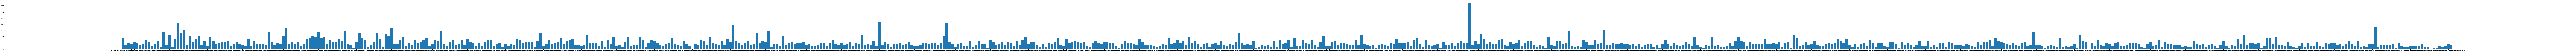

In [96]:
fig, ax = plt.subplots(figsize=(300, 6), layout='constrained')
ax.bar(keys, list(values))